<a href="https://colab.research.google.com/github/ashutoshsinha25/tensorflow-developement/blob/main/Neural%20Network%20Classification%20with%20TensorFlow/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write a neural network for classification problem
A Classification problem is where you try to calssify something as one thing or another

A few typess of classification problem
* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Create data to view and fit

In [ ]:
from sklearn.datasets import make_circles
# make 100 examples 
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)


In [ ]:
# Checkout the features 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is little hard to understand right now , lets visualize it to see what it is 

In [ ]:
X[0][0],X[0][1]

(0.7542462506997276, 0.23148073787097836)

In [ ]:
import pandas as pd

circles = pd.DataFrame({'X0:':X[:, 0],'X1:':X[:,1],'labels:':y}) # X0:X[:,0] , her [] is ['all of the item' , 'in this axis']
circles

,X0:,X1:,labels:
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


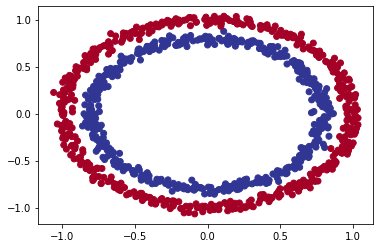

In [ ]:
# Visualize with a plot 
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1] , c=y , cmap = plt.cm.RdYlBu)

## Input and output shapes of nn

In [ ]:
# Check the shapes of features and labels
X.shape , y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we are working with
len(X) , len(y)

(1000, 1000)

In [ ]:
# View first example pf features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
X[0].shape

(2,)

## Steps in modeling

The steps in modelling with tensorflow are typically:
1. Create a model 
2. Compile the model
3. Fit the model
4. evaluate the model
5. tweak the model
6. again follow the steps from 3 onwards...

In [ ]:
# Mymodel 
import tensorflow as tf
tf.random.set_seed(42)
mymodel = tf.keras.Sequential([
                               tf.keras.Input(shape=(None,1)),
                               tf.keras.layers.Dense(100,activation ='relu'),
                               tf.keras.layers.Dense(1,activation = 'softmax')
])

mymodel.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
mymodel.fit(X[:900,:],y[:900],epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:
#Import library
import tensorflow as tf
tf.random.set_seed(42)

# Create a model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             
])

# Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=5) 

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Lets try and improve our model by training for longer...
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification and our model is getting around 50% accuracy , its performming as if its just guessing.
So lets step things up a notch and add an extra layer.

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['accuracy'])
model_2.fit(X,y,epochs = 100 , verbose = 0)

In [ ]:
#evaluate the new model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [ ]:
# still the model looks like its just guessting between two things 
# Lets improve the model again

## Improving our model

Let's look into our bag of tricks to see how to improve our model

1. Create a model- we moght want to add more layers , or increase of hidden units within a lyer
2. Compile a model - here we might want to choose a different optimizatiob function
3. Fit a model - fit for more epochs , ie leave it fraining for longer


In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
model_3.fit(X,y,epochs = 100,verbose = 0)


In [ ]:
#evaluate our model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]


To visulize our model's prediction , let's create a function 'plot_decision_boundary()' , the function will:

* Take in a trained model , features (X) and label y.
* Create a meshgrid of the different X Visualize
* Make predictions across meshgrid
* Plot the predictions as well as the line between zones( where each unique class falls)

In [ ]:
import numpy as np 
def plot_decision_boundary(model , X, y):
   '''
   PLots the decision bounary created by a model predicting on X.
   '''

   #Define the axis bounaries of the plot and create a meshgrid

   x_min , x_max = X[:,0].min()-0.1 , X[:,1].max()+0.1
   y_min , y_max = X[:,1].min()-0.1 , X[:,0].max()+0.1

   xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
   
   # Create aX values (we're going to make predictions on these)
   x_in = np.c_[xx.ravel(),yy.ravel()] # stack 2D array together

   # Make prediction
   y_pred = model.predict(x_in)

   # Check for multiclass

   if len(y_pred[0])>1:
     print('doing multiclass classification')
     # we have to reshape pur prediction to get them ready for plotting
     y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape) 
   else:
     print('doing binary classification')
     y_pred = np.round(y_pred).reshape(xx.shape)
  
   # Plot the decision boundary
   plt.contourf(xx,yy,y_pred,cmap = plt.cm.RdYlBu , alpha = 0.7)
   plt.scatter(X[:,0] , X[:,1],c=y,s=40,cmap = plt.cm.RdYlBu)
   plt.xlim(xx.min(),xx.max())
   plt.ylim(yy.min(),yy.max())


doing binary classification


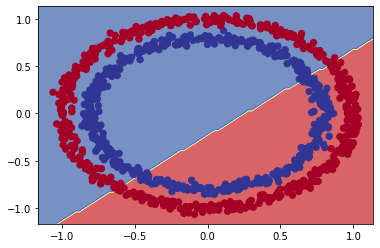

In [ ]:
plot_decision_boundary(model_3 , X,y)

In [ ]:
# Let's see of our model can be used for regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

X_regression , y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [ ]:
# Split our regression data into train and test set

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs = 100)

Epoch 1/100


ValueError: ignored

Oh wait.... we compiled our model for a binary classification problem .
But , we're now working on a regression problem. Let's change the model to suit our data

In [ ]:
X_reg_train.shape

TensorShape([150])

In [ ]:
a = X_reg_train
a.shape,a

(TensorShape([150]), <tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745], dtype=int32)>)

In [ ]:
tf.reshape(a,[-1,1])

<tf.Tensor: shape=(150, 1), dtype=int32, numpy=
array([[  0],
       [  5],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 30],
       [ 35],
       [ 40],
       [ 45],
       [ 50],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100],
       [105],
       [110],
       [115],
       [120],
       [125],
       [130],
       [135],
       [140],
       [145],
       [150],
       [155],
       [160],
       [165],
       [170],
       [175],
       [180],
       [185],
       [190],
       [195],
       [200],
       [205],
       [210],
       [215],
       [220],
       [225],
       [230],
       [235],
       [240],
       [245],
       [250],
       [255],
       [260],
       [265],
       [270],
       [275],
       [280],
       [285],
       [290],
       [295],
       [300],
       [305],
       [310],
       [315],
       [320],
       [325],
       [330],
       [335],


In [ ]:
X_reg_train.ndim , y_reg_train.ndim

(1, 1)

In [ ]:
# Set random seed
tf.random.set_seed(42)
 
# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons
 
  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])
 
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['mae'])

In [ ]:
# Let's now try to fit our model again
model_3.fit(tf.expand_dims(X_reg_train,axis=-1), y_reg_train, epochs = 100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 293.4841 - mae: 293.4841
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 260.5320 - mae: 260.5320
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 262.4440 - mae: 262.4440
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 256.9070 - mae: 256.9070
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 256.6043 - mae: 256.6043
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 257.7247 - mae: 257.7247
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 254.5781 - mae: 254.5781
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 253.0442 - mae: 253.0442
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 258.7201 - mae: 258.7201
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 257.2287 - mae: 257.2287
Epoch 11/100
5/5 [=====================

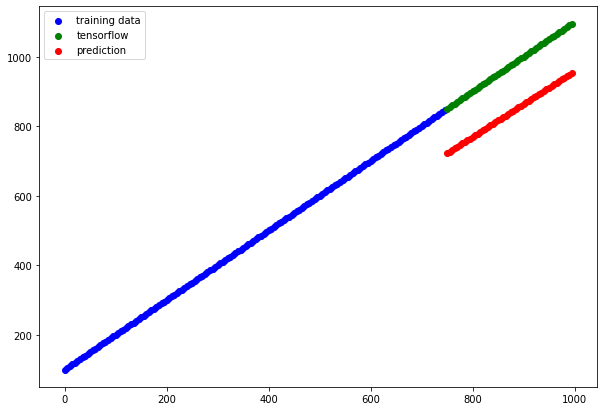

In [ ]:
# Make predictions with our trained model
y_reg_pred = model_3.predict(tf.expand_dims(X_reg_test,axis=-1))

# Ploe the model predictions against our  regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train, c='b',label='training data')
plt.scatter(X_reg_test , y_reg_test,c='g',label='tensorflow')
plt.scatter(X_reg_test,y_reg_pred , c='r',label='prediction')
plt.legend()

## The missing piece: Non - linearity



In [ ]:
# create the model based on basic input , 1 hidden with 1 neuron and output as done in tensorflow playground
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation = tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X,y,epochs=100)

NameError: ignored

In [ ]:
# CHeck out our data 
plt.scatter(X[:,0] , X[:,1],c=y,cmap = plt.cm.RdYlBu)

In [ ]:
# Check the decision boundaries of our model
plot_decision_boundary(model_4,X,y)

In [ ]:
# our model is saying red region is for red color points , blue area is for blue color points and in yellow region , it could be 
# either red or blue.

 Let's try to build our first neural netowrk with non linear activation function

In [ ]:
# Creating model from tensorflow playground with relu activation

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
model_5.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])
history = model_5.fit(X,y,epochs=100)

In [ ]:
# TIme to replicate nn from tensorflow playground in code

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1)
])
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])
model_6.fit(X,y,epochs=250)

In [ ]:
#evaluate the model 
model_6.evaluate(X,y)

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
# Let's model the final model by making another addition of activation in output layer aswell

In [ ]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(4,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])
model_7.fit(X,y,epochs=250)

In [ ]:
#evaluate the model
model_7.evaluate(X,y)

In [ ]:
plot_decision_boundary(model_7,X,y)

Now we've discussed linear and non linear functions, let's see them in action

In [ ]:
# Create a toy tensor( similar to data we've passed to our model)

A = tf.cast(tf.range(-10,10),dtype = tf.float32)
A

In [ ]:

# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid 

def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid on our toy tensor
sigmoid(A)

In [ ]:
# plot our A (trasformed by sigmoid)

plt.plot(sigmoid(A))

In [ ]:
# Let's prelicate the relu function

def relu(x):
  return tf.maximum(0,x)

# Using our relu function on our toy data
print(relu(A))

In [ ]:
# Plot the relu function with our toy data
plt.plot(relu(A))

In [ ]:
# Let's replicate linear activation function

def linear(x):
  return x

plt.plot(linear(A))


In [ ]:
# Does the linear function change anything?

plt.plot(A)

In [ ]:
plt.plot(linear(A))

## Evaluating and improving our classification model

So far we've been training and testing on same dataset..

However, in machine learning this is basically a sin.

So let's create a training and testing sets.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
X # random order

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y # random_order

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
# Split into train and test set
#1. By using train_test_split of sklearn 
#2. By indexing 

X_train , y_train = X[:800] , y[:800]
X_test , y_test = X[800:] , y[800:]


X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# recreating the model 
# smae as model_7 but we have increased our lr to 0..01
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=['accuracy'])
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
# now evaluating our model with testing data

model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

In [ ]:
# make predictions with our model
y_pred = model_8.predict(X_test)

In [ ]:
y_pred

array([[9.2475474e-01],
       [9.8626065e-01],
       [8.8418221e-01],
       [9.0230829e-01],
       [5.9810191e-02],
       [3.4748256e-02],
       [8.3334899e-01],
       [1.2145874e-01],
       [9.8855591e-01],
       [2.3215386e-01],
       [9.8138773e-01],
       [3.9715350e-01],
       [9.7192121e-01],
       [7.5923693e-01],
       [9.3913782e-01],
       [8.5320526e-01],
       [9.3184888e-01],
       [6.6531575e-01],
       [2.8207153e-02],
       [8.9813828e-01],
       [2.7853101e-02],
       [7.7952683e-01],
       [8.6583203e-01],
       [8.8960290e-01],
       [2.6974529e-02],
       [8.0229342e-01],
       [8.4687877e-01],
       [1.7050084e-01],
       [3.0399829e-02],
       [9.4128472e-01],
       [2.3993671e-02],
       [9.1345924e-01],
       [8.1482565e-01],
       [4.4240266e-02],
       [3.3780777e-01],
       [9.3356711e-01],
       [9.6126556e-01],
       [8.1971443e-01],
       [9.9626809e-01],
       [9.0508819e-01],
       [9.8540556e-01],
       [5.863493

doing binary classification
doing binary classification


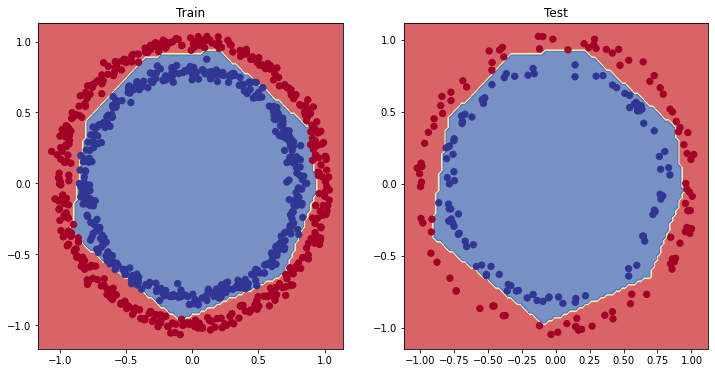

In [ ]:
# PLot the decision boundaries for testing and training sets
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

## Plot the loss(or training ) curves

In [ ]:
type(history.history)

dict

In [ ]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846511960029602,
  0.6777209639549255,
  0.6735945343971252,
  0.6681485772132874,
  0.6632686853408813,
  0.6545672416687012,
  0.6412575244903564,
  0.6264281272888184,
  0.6038310527801514,
  0.5714036226272583,
  0.540442943572998,
  0.5015039443969727,
  0.46833187341690063,
  0.4113016128540039,
  0.3625059425830841,
  0.32090437412261963,
  0.2847079932689667,
  0.25971999764442444,
  0.23746901750564575,
  0.213519

In [ ]:
# Convert the history object into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'loss curve')

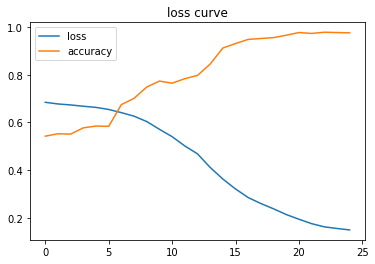

In [ ]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title('loss curve')

**Note:** For many problems , the loss function going down means the model is improving( the predictions it's making is getting closer to the gorund trth labels)

# Finding the best learning rate

To find the ideal learning rate( the learning rate where the loss decreases the most during the training) we're going to use the following steps

* A learning rate **callback** -  you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use same one as abonve but we are practicing bilding models here)
* A modified loss curve plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4 , activation = 'relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])
# 2. Compile the model
model_9.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])

# 3. Create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# 4. Fit the model

history_9 = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss:

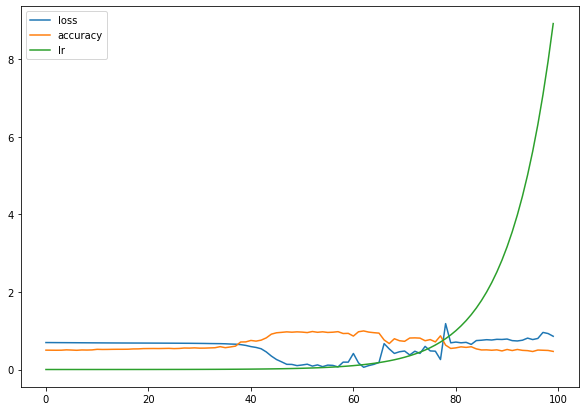

In [ ]:
# Checkout the history

pd.DataFrame(history_9.history).plot(figsize=(10,7))

Text(0.5, 1.0, 'learning rate vs loss')

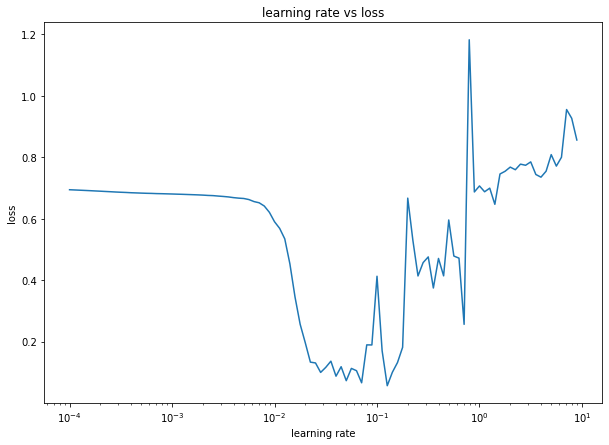

In [ ]:
# Plot the learning rate vs the loss

lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

##from the lowest point in the graph , our ideal learning rate would be 10 times smaller than the lowest point , ie here the lowest point is at around 10^-1 so our ideal learning rate would be in between 10^-2 to 10^-1

In [ ]:
# examples of other typical learnign rates values:

10**0 , 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try to use a higher ideal learning rate with the same model 

# Set random seed

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4,'relu'),
                                tf.keras.layers.Dense(4,'relu'),
                                tf.keras.layers.Dense(1,'sigmoid')
])
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(0.02),
                 metrics=['accuracy'])
history_10 = model_10.fit(X_train,y_train,epochs=20) # 5 less than before


Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

In [ ]:
# evaluate model_10 
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [ ]:
# evaluate model_8
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

doing binary classification
doing binary classification


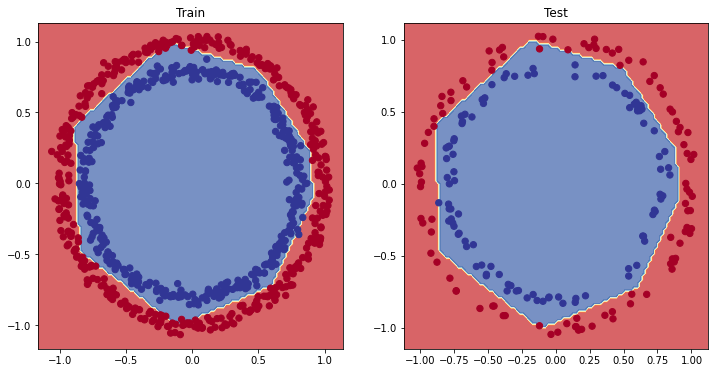

In [ ]:
# plot the decision boundaries for the training and the test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10,X_test,y_test)
plt.show()

## More classificaition evaluation methods

Alongside visualizing our models results as much as possible, there are handfull of other classification evaluation methods and metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification report (from scikit learn)

In [ ]:
# Check the accuracy of our model
loss , accuracy = model_10.evaluate(X_test,y_test)
print(f'Model loss on the test set:{loss}')
print(f'Model accuracy on the test set:{(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set:0.05740184709429741
Model accuracy on the test set:99.00%


##How about a confusion matrix

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix


# Make predictions

y_pred = model_10.predict(X_test)

# Confusion matrix

confusion_matrix(y_test,y_pred)

ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_pred[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

In [ ]:
tf.squeeze(y_pred[:10]),y_pred[:10]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([9.8526537e-01, 9.9923790e-01, 9.9032348e-01, 9.9706942e-01,
        3.9622977e-01, 1.8126935e-02, 9.6829069e-01, 1.9746721e-02,
        9.9967170e-01, 5.6460500e-04], dtype=float32)>, array([[9.8526537e-01],
        [9.9923790e-01],
        [9.9032348e-01],
        [9.9706942e-01],
        [3.9622977e-01],
        [1.8126935e-02],
        [9.6829069e-01],
        [1.9746721e-02],
        [9.9967170e-01],
        [5.6460500e-04]], dtype=float32))

Oops.. looks like our preditions array has come out in the form of **prediction probability** form. So the standard output from the sigmoid( or softmax) activation fucntions

In [ ]:
# Cnnvert our prediction probabilities into binary format and view the first 10

tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix

confusion_matrix(y_test,tf.round(y_pred))

array([[99,  2],
       [ 0, 99]])

How about we prettify our confusion matrix?

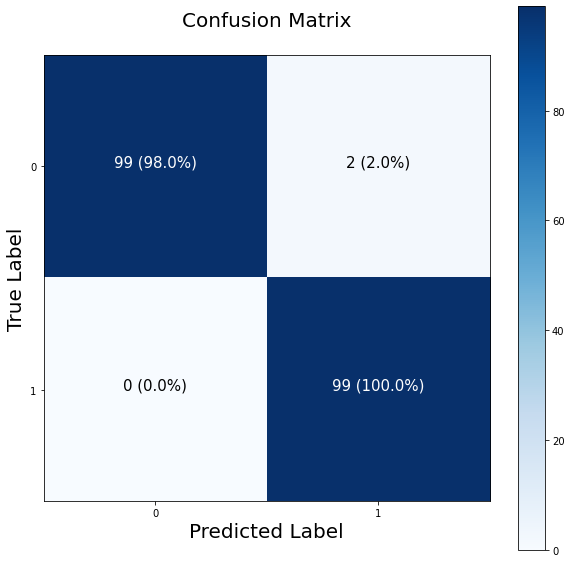

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit learn plot confusion matrix function

import itertools

figsize=(10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0] 

# let's prettify it 
fig , ax = plt.subplots(figsize=figsize)

# Create a matrix plot

cax = ax.matshow(cm , cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False

if classes:
  labels = classes # multiclass classification
else:
  labels = np.arange(cm.shape[0]) # binary classification

#Label the axes

ax.set(title = 'Confusion Matrix',
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x axis labels to the bottom 
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust the label size 

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Set the threshold
threshold = (cm.max()+ cm.min())/ 2.


# plot the text on each cell 
 
for i, j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
  plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]> threshold else 'black',
           size = 15)


## Working with a larger example ( ie multiclass classification)

When you have more than two classes as an option it's known as multiclass classification.
* This means if you have 3 different classes , you have multiclass classification
* It also means if we have 100 classes then also its multiclass classification


In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and testing sets

(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()


In [ ]:
# Show the first training example
print(f'training sample:\n{train_data[0]}\n')
print(f'training labels:\n{train_labels[0]}\n')

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example

train_data[0].shape , train_labels[0].shape

((28, 28), ())

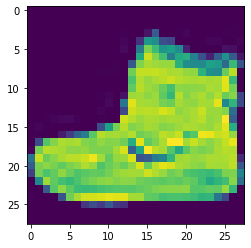

In [ ]:
# plot a single sample

import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Create a samll list so we can index onto our training labels so they are human readable
class_name = ['T-shirt/Top' , 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

len(class_name)

10

Text(0.5, 1.0, 'Trouser')

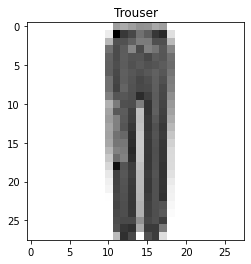

In [ ]:
# Plot an example img and its label
index_of_choice = 1000
plt.imshow(train_data[index_of_choice],cmap = plt.cm.binary)
plt.title(class_name[train_labels[index_of_choice]])

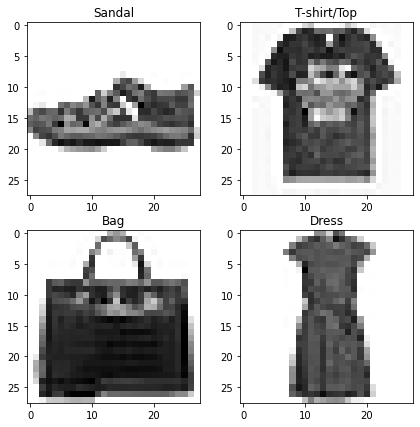

In [ ]:
# PLot multiple random images 
import random

plt.figure(figsize=(7,7))

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap = plt.cm.binary)
  plt.title(class_name[train_labels[rand_index]])

## Building a multi-class classification model

* Input shape = 28*28
* output shape = 10
* loss = tf.keras.losses.CategoricalCrossentropy()
  * if your labels are one_hot encoded, use CategoricalCrossentropy()
  * if your labels are in integer form, use SparseCategoricalCrossentropy()
* output layer activation = softmax


In [ ]:
# check input shape
train_data[0].shape

(28, 28)

In [ ]:
# check output shape
len(class_name)

10

In [ ]:
# our data need to be flatten from (28*28) to (None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation ='relu'),
                                tf.keras.layers.Dense(4,activation ='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
non_norm_history = model_11.fit(train_data,train_labels,epochs=10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
tf.one_hot(train_labels,depth = 10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [ ]:
# same as above but instead of SparseCategoricalCrossentory() , we use CategoricalCrossEntory() which need on_hot encoded labels
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation ='relu'),
                                tf.keras.layers.Dense(4,activation ='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
non_norm_history = model_11.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# if we get a shape error we should look into input shape, output shape, or loss function. These are the three main form of occurance of shape error

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 4)                 3140      
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of train_data
train_data.min() , train_data.max()

(0, 255)

Neural network prefered data to be scaled( or normalized), this means they like to have the numbers in the tensors they try to find patterns in between 0 and 1

In [ ]:
# we can get our training and testing adta between 0 and 1 by dividing by the maximum

train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

#check the min and max values of normalized data
train_data_norm.min() , train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])

model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm , train_labels,epochs=10,validation_data = (test_data_norm , test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

> 🗝️ **Note:** NN tends to preder data in numerical form as well as scaled/normalizeed form(between 0 and 1)

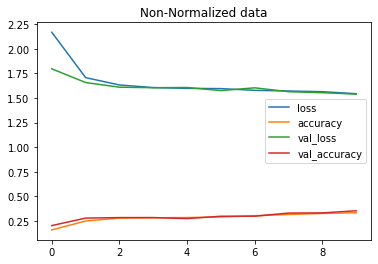

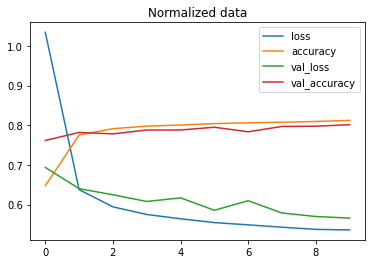

In [ ]:
import pandas as pd
# Plot non - normalized data loss curve
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized data')
#plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title='Normalized data')

>🗝️ **Note:** - the same model with even *slightly* different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria(e.g. same architecture but different data or same data but different architecture).

## Finding an ideal learning rate

In [ ]:
tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])
model_13.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = 'adam',
                 metrics=['accuracy'])

# create lr scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
find_lr_history = model_13.fit(train_data_norm,train_labels,epochs=40 ,validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'finding the ideal learning rate')

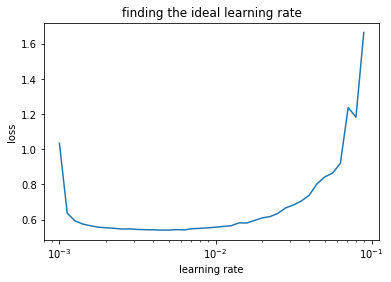

In [ ]:
# Pot learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('finding the ideal learning rate')

In [ ]:
# Let's refit the model with ideal learning rate

tf.random.set_seed(42)
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(4,activation='relu'),
                                tf.keras.layers.Dense(10,'softmax')
])
model_14.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                 metrics=['accuracy'])
history_14 = model_14.fit(train_data_norm,train_labels, epochs=20,validation_data=(test_data_norm , test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our model


To evaluate our model , we could:
* evaluate its performance using other classification metrics(such as confusion matrix)
* Assess some of its predictions(through visualizations)
* Improve its results( by training it fr longer or changing the architecture)
* Save and export it for use in application

In [ ]:
# Create a confusion matrix



import itertools
from sklearn.metrics import confusion_matrix 

def make_confusion_matrix(y_true , y_pred, classes=None,figsize=(10,10),text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true,y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0] 

    # let's prettify it 
    fig , ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm , cmap=plt.cm.Blues)
    fig.colorbar(cax)
    #Set labels to be classes
    if classes:
      labels = classes # multiclass classification
    else:
      labels = np.arange(cm.shape[0]) # binary classification

    #Label the axes
    ax.set(title = 'Confusion Matrix',
          xlabel = 'Predicted Label',
          ylabel = 'True Label',
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)

    # Set x axis labels to the bottom 
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust the label size 

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    # Set the threshold
    threshold = (cm.max()+ cm.min())/ 2.


    # plot the text on each cell 
    
    for i, j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
      plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
              horizontalalignment = 'center',
              color = 'white' if cm[i,j]> threshold else 'black',
              size = text_size)


In [ ]:
class_name


['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# make some predictions

y_prob = model_14.predict(test_data_norm) # prob is short for prediction probabilities
y_prob[:10]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09],
       [7.30094826e-03, 9.60110366e-01, 7.54836719e-06, 3.13696042e-02,
   

> 🗝️🗝️ remember to make prediction on the same kind of data  your model was trained on (e.g. if your model trained on normalized data, you'll want ot make prediction on normalized data)

In [ ]:
test_data[:10],test_data_norm[:10]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [ ]:
y_prob[0] , tf.argmax(y_prob[0]) , class_name[tf.argmax(y_prob[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
class_name

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
 # Convert all prediction probabilities into int

 y_pred = y_prob.argmax(axis=1)
 y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
confusion_matrix(test_labels,y_pred)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

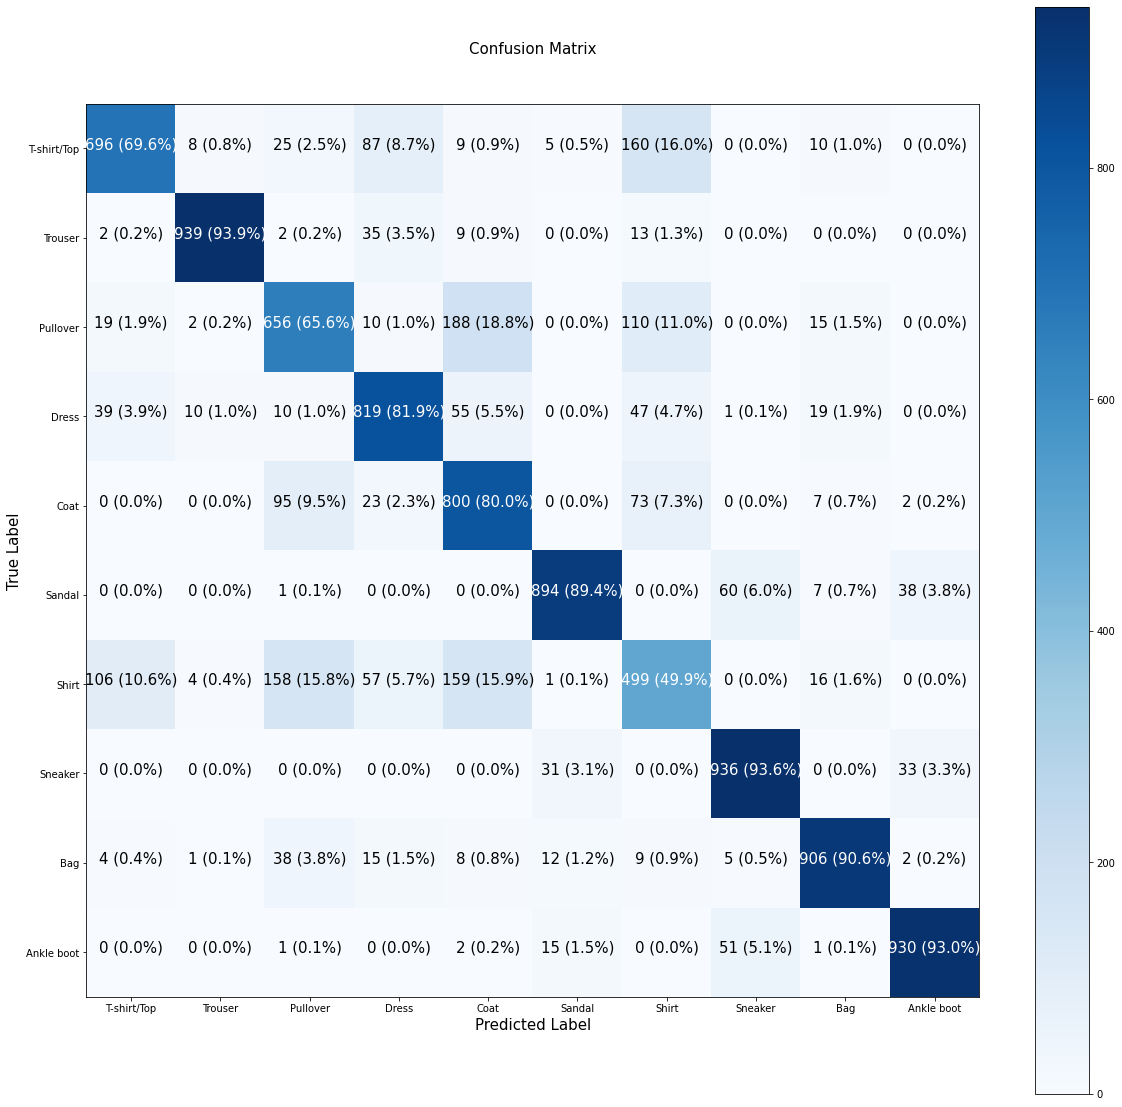

In [ ]:
make_confusion_matrix(test_labels,y_pred,classes = class_name,text_size=15,figsize=(20,20))

> 🗝️ **Noet:**  Often when working with images and other form of visual data, it's a good idea to visualize as much as possible to develope a further understanding of the data and the inputs and outputs of your models.

In [ ]:
import random

def plot_random_image(model, images , true_labels,classes):
  """
  Picks a random image, plots it and labels it with a predction and truth labels
  """

  # set up random int
  i =random.randint(0,len(images))

  # create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plot the image
  plt.imshow(target_image,cmap = plt.cm.binary)

  # change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color='red'

  # Add xlabel imformation(prdiction/true label)
  plt.xlabel('pred: {} {:2.0f}% (True:{})'.format(pred_label, 
                                                  100*tf.reduce_max(pred_probs),
                                                  true_label),
             color=color) # set the color to green or red based on if prediction is right or wrong

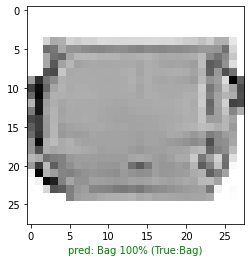

In [ ]:
plot_random_image(model_14,
                  test_data_norm, # always make predictions on the same kind of data your model is trained on 
                  test_labels,
                  class_name)

## What patterns is our model learning?

In [ ]:
# find the layers of our most recent model
model_14.layers

In [ ]:
# extract a perticular layer
model_14.layers[1]

In [ ]:
# find the pattern learned by a perticula layer
weights, biases = model_14.layers[1].get_weights()

In [ ]:
weights,weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [ ]:
biases , biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

>  every neuron has a bias vector. Each of these is paired with a weights matric. The bias vector gets initialized as zero( atleast in the case of a tensorfloe Dense layer). The bias vector dictates how much the patterns within the cirresponding wights matrix should influence the next layer.

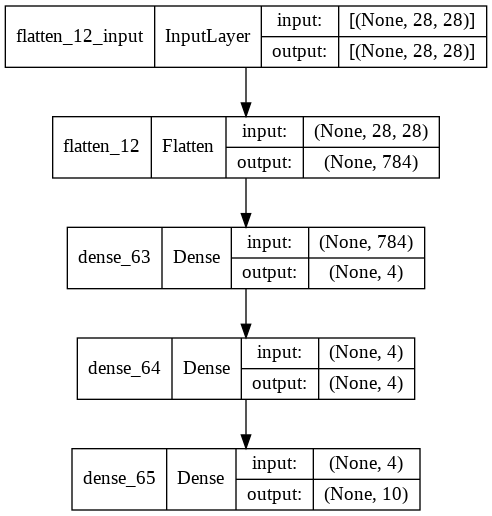

In [ ]:
# lets check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model 
 
# see the input and output of each layer
plot_model(model_14,show_shapes=True)